# Simple Classification Machine Learning Example
With the vast amount of data at our disposal we are all looking for ways to use it to our advantage. In the recent years, machine learning algorithms have taken us by storm and are becoming household items in fields ranging from medicine, speech recognition and video games, to name a few. Even though it may sound daunting at first, getting actionable insights from data with the help of machine learning doesn’t have to be on par with developing rockets or baking the perfect soufflé.

In this workshop we will explore ways to utilize machine learning in a simple way without needing any prior knowledge of the field or what is happening behind the scenes.  

Tho, some requirenments are needed. You will need to have a working jupyter notebook environment as well as the following pip packages: 
    
- pandas
- matplotlib
- scikit-learn 

I would recommend using Visual Studio Code or goggle colab (https://colab.research.google.com/). Once, this is all set up you are ready to go. 

## Data Gathering: A Classic - The Iris Dataset
For this tutorial we are gonna use the Iris Dataset. This is a very common dataset used to learn the important concepts of ML classification. The dataset holds data about three different iris species including some properties of each flower. 
Source: https://www.kaggle.com/datasets/uciml/iris 

In [1]:
# importing pandas for data preprocession and csv handling - https://pandas.pydata.org/docs/ 
import pandas as pd

# Note we will use the following acronyms in our variables: 
# df = data frame - commonly used for pandas data frames 

# loading our iris dataset into a pandas dataframe
iris_df = pd.read_csv("data/iris_data.csv")

# printing out the the first 5 rows of our data and have a look 
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# print the shape of the df (rows, columns)
iris_df.shape

(150, 6)

In [3]:
# now let's look at the columns in more detail 
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# looking into how many samples we have per species
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
# generating general statistics about columns 
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# changing the data type of species to category
iris_df["Species"] = iris_df.Species.astype("category")
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


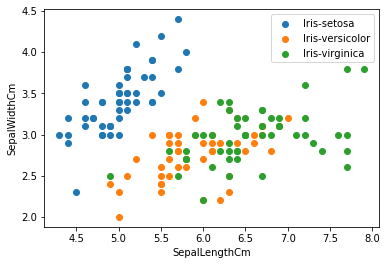

In [7]:
# import matplotlib
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

# creating subplots per species 
for cat in iris_df['Species'].cat.categories: 
    ax.scatter(x=iris_df['SepalLengthCm'][iris_df.Species==cat], y=iris_df['SepalWidthCm'][iris_df.Species==cat], label=cat)

# adding labels and legend
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
# plotting SepalLengthCm vs SepalWidthCm as scatterplot per species 
plt.show()

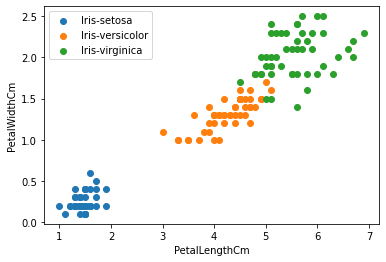

In [8]:
fig, ax = plt.subplots()

# creating subplots per species 
for cat in iris_df['Species'].cat.categories: 
    ax.scatter(x=iris_df['PetalLengthCm'][iris_df.Species==cat], y=iris_df['PetalWidthCm'][iris_df.Species==cat], label=cat)

# adding labels and legend
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
# plotting PetalLengthCm vs PetalWidthCm as scatterplot per species 
plt.show()

# Note these features seem pretty descriptive to classify the flowers

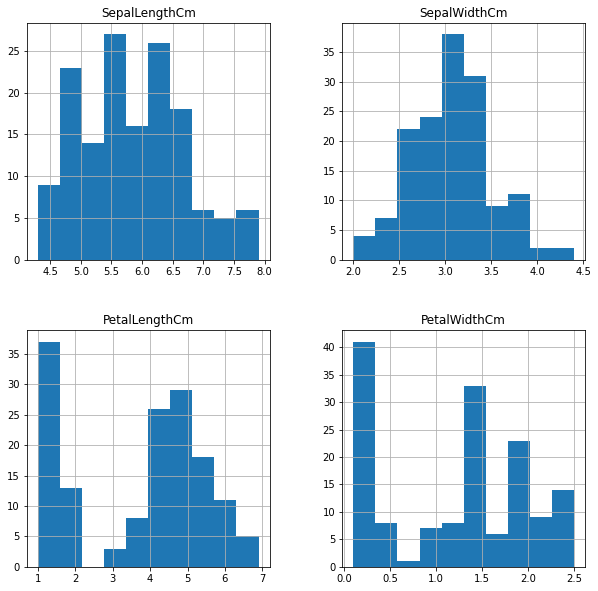

In [9]:
# printing the histograms of the numeric properties
iris_df.drop(columns='Id').hist(figsize=(10,10))
plt.show()

## Data Pre-Processing
In this step you would do all data pre-processing necassary. That can include a wide range of things ranging from feature selection to feature engineering. In our case we only want to drop the ``Id`` column as it is not an actual property of the flowers. Further, we will split our whole dataset into a training and test dataset. The training dataset will be used to train our model and the test dataset will be used in the evaluation of the performance of our model. 

In [10]:
# remember our current columns 
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
# now dropping the id column as that is not an actual property of the class
iris_df = iris_df.drop(columns='Id')
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
# import sklearns capability to split the dataset into train and test
from sklearn.model_selection import train_test_split

# splitting the iris dataset into train (70%) and test (30%)
train_df, test_df = train_test_split(iris_df, test_size=0.3)
print(f'train shape={train_df.shape} and test shape={test_df.shape}')

train shape=(105, 5) and test shape=(45, 5)


In [13]:
# seperate features from labels for the train and test dataset 
train_df_features = train_df.drop(columns='Species')
train_df_labels = train_df.Species
print(f'train df features: {train_df_features.shape}')
print(train_df_features.head(2))
print(f'\ntrain df labels: {train_df_labels.shape}')
print(train_df_labels.head(2))

# seperate features from labels for the train and test dataset 
test_df_features = test_df.drop(columns='Species')
test_df_labels = test_df.Species
print(f'\ntest df features: {test_df_features.shape}')
print(test_df_features.head(2))
print(f'\ntest df labels: {test_df_labels.shape}')
print(test_df_labels.head(2))

train df features: (105, 4)
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
61            5.9           3.0            4.2           1.5
54            6.5           2.8            4.6           1.5

train df labels: (105,)
61    Iris-versicolor
54    Iris-versicolor
Name: Species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

test df features: (45, 4)
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
105            7.6           3.0            6.6           2.1
70             5.9           3.2            4.8           1.8

test df labels: (45,)
105     Iris-virginica
70     Iris-versicolor
Name: Species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


## Model Training and Evaluation 
In the model training step we finally train a machine learning model. Yay! Deciding on which algorithm to use can sometimes be a little tricky and usually you go through iterations and try different ones. In the following we will train three different models and compare them: LogisitcRegression, a DecisionTree an K-Nearest Neighbour. 
The steps are the same fore all models: 
1. Train the model with the training dataset using the ``.fit()``-method 
2. [Optional] Predict the outcome of the trained model with the test dataset using the ``.predict()``-method 
3. Evaluate the performance of the model by comparing the predicted outcome with the actual outcome 

Note: we will use accuracy as the evaluation metric. However, there are many different metrics you can evalute a model against and might be better suited for the problem at hand. 

### Logistic Regression
In logistic regression the probabilities of class membership are modeled using a logistic function. 
More Info can be found here: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression 

In [14]:
# importing logistic regression from sklearn 
from sklearn.linear_model import LogisticRegression

# Note we will use the following acronyms in our variables: 
# clf = classifier
# lr = logisitc regression 
# dt = decision tree 
# knn = k-nearest neighbour
# pred = prediction 

# creating a logistic regression model 
clf_lr = LogisticRegression(max_iter=200)
# training the model on our train dataset 
clf_lr.fit(train_df_features, train_df_labels)
# printing out the mean accuracy score
print(f'Logistic Regression Accuracy: {clf_lr.score(test_df_features, test_df_labels)}')
# predicting the output for our test dataset 
pred_lr = clf_lr.predict(test_df_features)
# printing the results of the prediction and actual
test_df.assign(prediction=pred_lr).head()

Logistic Regression Accuracy: 0.9777777777777777


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prediction
105,7.6,3.0,6.6,2.1,Iris-virginica,Iris-virginica
70,5.9,3.2,4.8,1.8,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor


In [15]:
# some classification models in sklearn can also return the probability of the class prediction 
pred_lr_probabilities = clf_lr.predict_proba(test_df_features)
pred_lr_probabilities_df = pd.DataFrame(pred_lr_probabilities, columns=iris_df['Species'].cat.categories).applymap("{0:.2f}".format)
pred_lr_probabilities_df.assign(prediction=pred_lr).head()

,Iris-setosa,Iris-versicolor,Iris-virginica,prediction
0,0.00,0.01,0.99,Iris-virginica
1,0.00,0.47,0.52,Iris-virginica
2,0.97,0.03,0.00,Iris-setosa
3,0.00,0.01,0.99,Iris-virginica
4,0.00,0.80,0.20,Iris-versicolor


### Decision Tree 
In a decision tree classification classification trees are created to determine class membership. More info can be found here: https://en.wikipedia.org/wiki/Decision_tree_learning 

In [16]:
# importing decision tree classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_df_features, train_df_labels)
print(f'Decision Tree Accuracy: {clf_dt.score(test_df_features, test_df_labels)}')

Decision Tree Accuracy: 0.9555555555555556


### K-Nearest Neighbour 
In the k-nearest neighbour algorithm the class is identified by the most commmon class of its k-nearest neighbours. 
More info can be found here: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm 

In [17]:
# importing nearest neighbour classifier from sklearn 
from sklearn.neighbors import KNeighborsClassifier

# using the closest 3 neighbours for evaluating the class 
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(train_df_features, train_df_labels)
print(f'K-Nearest Neighbour (K=3) Accuracy: {clf_knn.score(test_df_features, test_df_labels)}')

K-Nearest Neighbour (K=3) Accuracy: 0.9777777777777777


### Hyper parameter testing 
It is very common to try different input parameters into your models. This is also referred to as hyper parameter testing. Let's try different parameters for the k nearest neighbour model. 

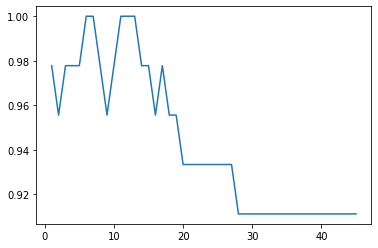

In [18]:
accuracy_values = {}

# gathering mean accuracy scores with different values for the nearest neighbours to use 
for x in range(1, test_df.shape[0]+1, 1): 
    clf_knn_x =  KNeighborsClassifier(n_neighbors=x)
    clf_knn_x.fit(train_df_features, train_df_labels)
    accuracy_values[x] = clf_knn_x.score(test_df_features, test_df_labels)

# plotting different accruacy values vs selected nearest neighbours 
plt.plot(accuracy_values.keys(), accuracy_values.values())
plt.show()

## Model Inference 
Once we selected our best performing model based on the metric we chose we can now use it to predict outcomes on new unlabelled data. That means we are gonna take the trained model and use the ``.predict()``-method to get the predictions. 

As we don't have any new data in this example - so let's just shuffle the original iris dataset and use that. 

In [19]:
shuffled_iris_df = iris_df.sample(frac=1)
inference = clf_knn.predict(shuffled_iris_df.drop(['Species'], axis=1))
shuffled_iris_df.assign(prediction=inference).head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prediction
115,6.4,3.2,5.3,2.3,Iris-virginica,Iris-virginica
29,4.7,3.2,1.6,0.2,Iris-setosa,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica,Iris-versicolor
143,6.8,3.2,5.9,2.3,Iris-virginica,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor,Iris-versicolor
